In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [18]:
rcParams['font.size'] = 14
rcParams['figure.figsize'] = [12, 10]

# 1. Finite-difference method for advection equation

In [3]:
def update_advection(grid, delta_x, delta_t, v):
    xs, times = grid.shape
    
    for t in range(times - 1):
        right = np.roll(grid[:, t], -1, axis=0)
        left = np.roll(grid[:, t], 1, axis=0)
    
        grid[:, t + 1] = 0.5 * (right + left) - (0.5 * v * delta_t / delta_x) * (right - left)
        grid[0, :] = 0
        grid[xs - 1, :] = 0
        
def advection_energy(grid):
    return np.sum(grid**2, axis=0)

def advection(min_x, max_x, delta_x, min_t, max_t, delta_t, v=1, w=5):
    range_x = max_x - min_x
    range_t = max_t - min_t

    num_x, num_t = int(range_x / delta_x), int(range_t / delta_t)
    grid = np.zeros((num_x, num_t))
    w = 5
    grid[:, 0] = np.exp(-np.linspace(min_x, max_x, int(range_x / delta_x))**2 / w**2)
    update_advection(grid, delta_x, delta_t, v)
    return grid

In [4]:
min_x, max_x, delta_x, min_t, max_t, delta_t = -20, 50, 0.1, 0, 25, 0.06

locations = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
times = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

grid = advection(min_x, max_x, delta_x, min_t, max_t, delta_t)

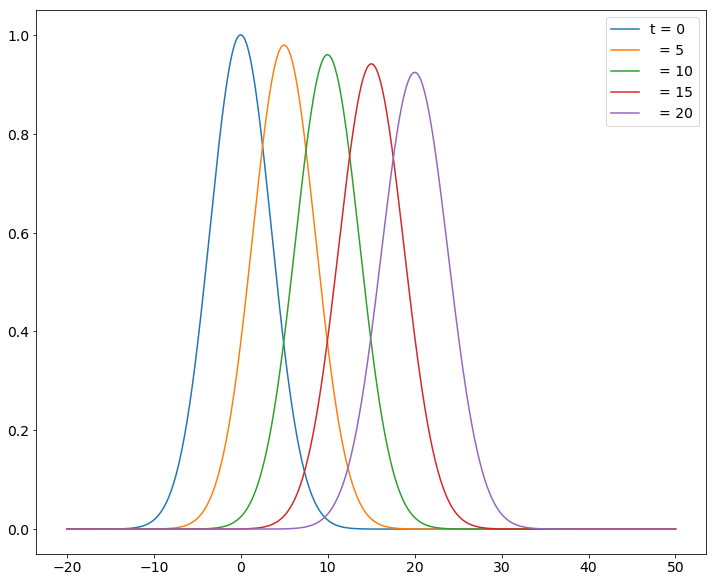

In [5]:
plt.plot(locations, grid[:, int(0 / delta_t)], label='t = 0')
plt.plot(locations, grid[:, int(5 / delta_t)], label='  = 5')
plt.plot(locations, grid[:, int(10 / delta_t)], label='  = 10')
plt.plot(locations, grid[:, int(15 / delta_t)], label='  = 15')
plt.plot(locations, grid[:, int(20 / delta_t)], label='  = 20')
plt.legend()
plt.show()

In [6]:
min_x, max_x, delta_x, min_t, max_t, delta_t = -20, 50, 0.1, 0, 25, 0.10

locations = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
times = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

grid = advection(min_x, max_x, delta_x, min_t, max_t, delta_t)

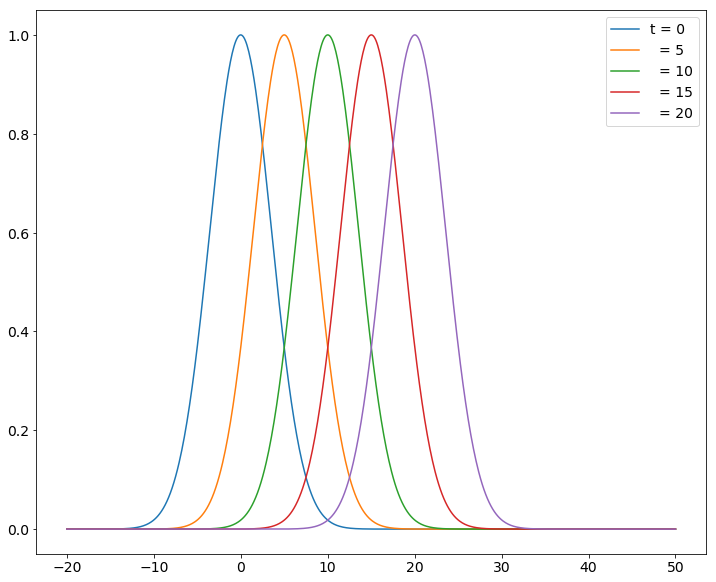

In [7]:
plt.plot(locations, grid[:, int(0 / delta_t)], label='t = 0')
plt.plot(locations, grid[:, int(5 / delta_t)], label='  = 5')
plt.plot(locations, grid[:, int(10 / delta_t)], label='  = 10')
plt.plot(locations, grid[:, int(15 / delta_t)], label='  = 15')
plt.plot(locations, grid[:, int(20 / delta_t)], label='  = 20')
plt.legend()
plt.show()

In [8]:
min_x, max_x, delta_x, min_t, max_t, delta_t = -20, 50, 0.1, 0, 25, 0.14

locations = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
times = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

grid = advection(min_x, max_x, delta_x, min_t, max_t, delta_t)

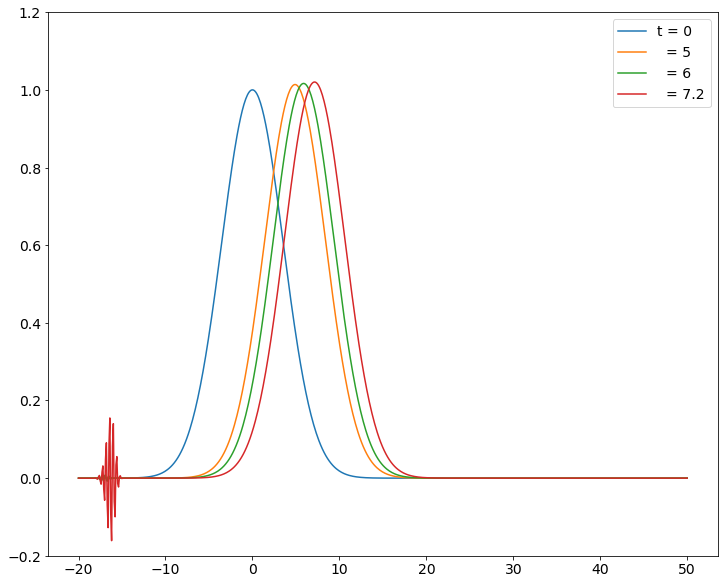

In [9]:
plt.plot(locations, grid[:, int(0 / delta_t)], label='t = 0')
plt.plot(locations, grid[:, int(5 / delta_t)], label='  = 5')
plt.plot(locations, grid[:, int(6 / delta_t)], label='  = 6')
plt.plot(locations, grid[:, int(7.2 / delta_t)], label='  = 7.2')
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()

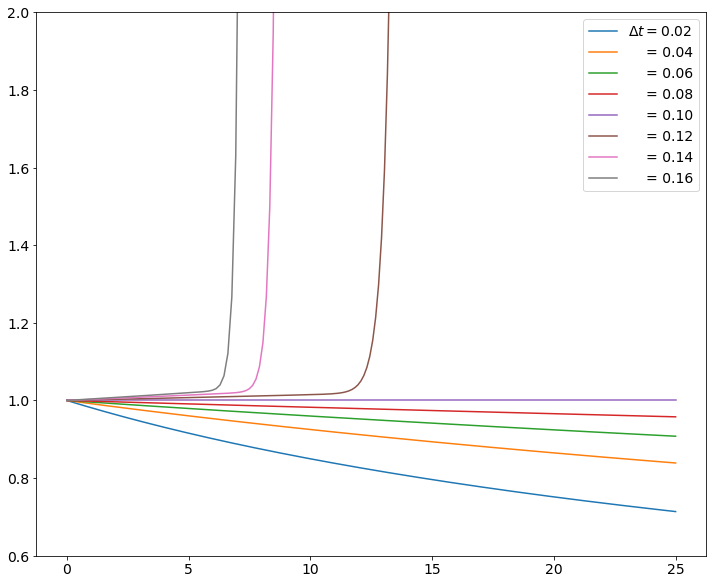

In [10]:
for delta_t in np.arange(0.02, 0.18, 0.02):
    min_x, max_x, delta_x, min_t, max_t = -20, 50, 0.1, 0, 25
    grid = advection(min_x, max_x, delta_x, min_t, max_t, delta_t)

    locations = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
    times = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))
    
    if delta_t != 0.02:
        plt.plot(times, advection_energy(grid) / advection_energy(grid)[0], label=r"    = {:0.2f}".format(delta_t))
    else:
        plt.plot(times, advection_energy(grid) / advection_energy(grid)[0], label=r"$\Delta t = {:0.2f}$".format(delta_t))

plt.ylim(0.6, 2)
plt.legend()
plt.show()

# 2. Crank-Nicholson method for diffusion equation

$$
u_j^{n+1} = u_j^n + \frac{D \Delta t}{2\Delta x^2} \left[ \left( u_{j+1}^{n+1} - 2 u_j^{n+1} + u_{j-1}^{n+1} \right) + \left( u_{j+1}^n - 2 u_j^n + u_{j-1}^n  \right)  \right]
$$

$$
 - \frac{D \Delta t}{2\Delta x^2} u_{j+1}^{n+1} + \left( 1 + \frac{D \Delta t}{\Delta x^2} \right) u_j^{n+1} - \frac{D \Delta t}{2\Delta x^2} u_{j-1}^{n+1} = \frac{D \Delta t}{2\Delta x^2} u_{j + 1}^{n} + (1 - \frac{D \Delta t}{\Delta x^2} ) u_j^n + \frac{D \Delta t}{2\Delta x^2} u_{j-1}^{n}
$$

$$
A \textbf{u}^{n+1} = B \textbf{u}^{n}
$$

\begin{bmatrix}
    1 + \frac{D \Delta t}{\Delta x^2} & \frac{D \Delta t}{2\Delta x^2} & 0 & 0 & ... & -\frac{D \Delta t}{2 \Delta x^2}\\
    -\frac{D \Delta t}{2 \Delta x^2} & 1 + \frac{D \Delta t}{\Delta x^2} & \frac{D \Delta t}{2\Delta x^2} & 0 & ... & 0 \\
    0 & -\frac{D \Delta t}{2 \Delta x^2} & 1 + \frac{D \Delta t}{\Delta x^2} & \frac{D \Delta t}{2\Delta x^2} & ... & 0 \\
    \vdots &  &  \ddots  &  &  & \vdots \\
    0 & ... & 0 & -\frac{D \Delta t}{2 \Delta x^2} & 1 + \frac{D \Delta t}{\Delta x^2} & \frac{D \Delta t}{2\Delta x^2} \\
    \frac{D \Delta t}{2\Delta x^2} & ... & ... & 0 & -\frac{D \Delta t}{2 \Delta x^2} & 1 + \frac{D \Delta t}{\Delta x^2} \\
\end{bmatrix}

In [11]:
def update_crank_nicholson(grid, delta_x, delta_t, D):
    xs, times = grid.shape
    
    r = (D * delta_t) / (2 * delta_x**2)
    
    diag = np.eye(xs, xs) * (1 + 2 * r)
    diag_down = np.roll(np.eye(xs, xs), 1, axis=0) * (-r)
    diag_up = np.roll(np.eye(xs, xs), -1, axis=0) * (-r)

    A = diag + diag_down + diag_up
    
    diag = np.eye(xs, xs) * (1 -2 * r)
    diag_down = np.roll(np.eye(xs, xs), 1, axis=0) * (r)
    diag_up = np.roll(np.eye(xs, xs), -1, axis=0) * (r)

    B = diag + diag_down + diag_up

    step = np.dot(np.linalg.inv(A), B)
    
    for t in range(times - 1):
        grid[:, t + 1] = np.dot(step, grid[:, t])

def crank_nicholson(min_x, max_x, delta_x, min_t, max_t, delta_t, D, w):
    x_vals = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
    t_vals = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))
    grid = np.zeros((len(x_vals), len(t_vals)))

    grid[:, 0] = np.exp(- x_vals**2 / w**2)
    update_crank_nicholson(grid, delta_x, delta_t, D)

    real = 1. / (np.sqrt(1 + 4 * D * np.outer(np.ones(len(x_vals)), t_vals) / w**2)) * \
                 np.exp(-np.outer(x_vals, np.ones(len(t_vals)))**2 / (w**2 + 4 * D * \
                                                                   np.outer(np.ones(len(x_vals)), t_vals)))        
    error = grid - real
    
    return grid, real, error

In [12]:
min_x, max_x, delta_x, min_t, max_t, delta_t, D, w = -60, 60, 0.1, 0, 70, 0.1, 0.5, 10
x_vals = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
t_vals = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

grid, real, error = crank_nicholson(min_x, max_x, delta_x, min_t, max_t, delta_t, D, w)

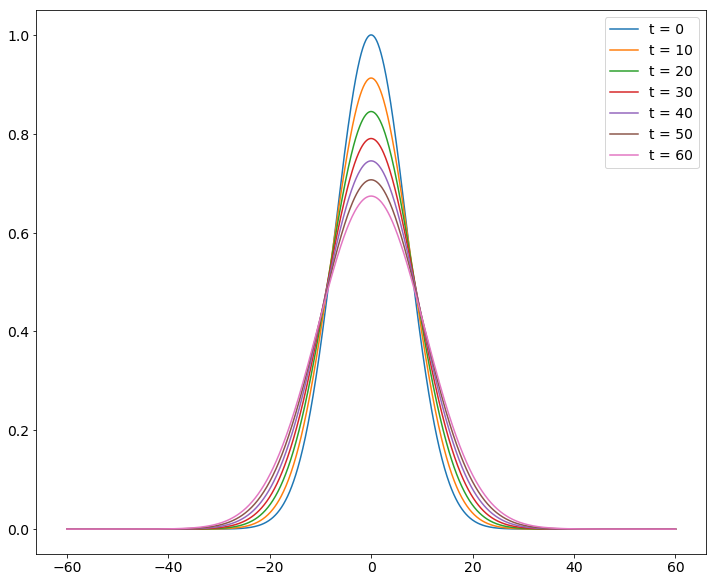

In [13]:
for t in [0, 10, 20, 30, 40, 50, 60]:
    plt.plot(x_vals, grid[:, int(t / delta_t)], label="t = {:d}".format(t))
plt.legend()
plt.show()

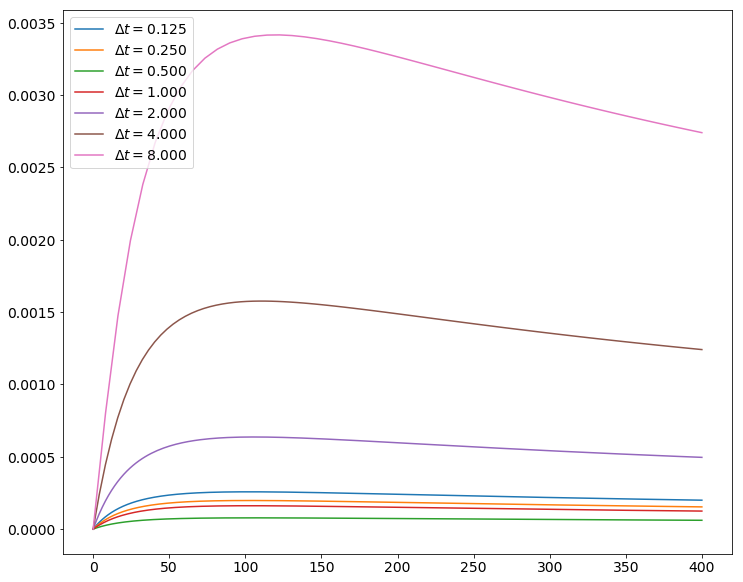

In [23]:
peak_errors = []
delta_ts = [0.125, 0.25, 0.5, 1, 2, 4, 8]

for delta_t in delta_ts:
    min_x, max_x, delta_x, min_t, max_t, D, w = -60, 60, 0.1, 0, 400, 0.5, 10
    x_vals = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
    t_vals = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

    grid, real, error = crank_nicholson(min_x, max_x, delta_x, min_t, max_t, delta_t, D, w)
    
    peak = int((max_x - min_x) / delta_x / 2)
    peak_error = error[peak, :]
#     plt.subplot(211)
    plt.plot(t_vals, np.abs(peak_error), label=r'$\Delta t = {:1.3f}$'.format(delta_t))
#     plt.subplot(212)
    
plt.legend()
plt.show()

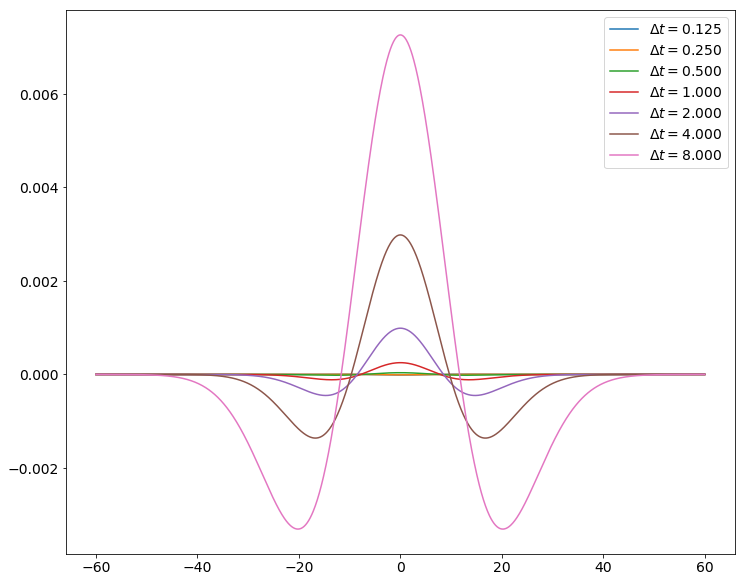

In [27]:
peak_errors = []
delta_ts = [0.125, 0.25, 0.5, 1, 2, 4, 8]

for delta_t in delta_ts:
    min_x, max_x, delta_x, min_t, max_t, D, w = -60, 60, 0.1, 0, 200, 0.5, 10
    x_vals = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
    t_vals = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

    grid, real, error = crank_nicholson(min_x, max_x, delta_x, min_t, max_t, delta_t, D, w)

    plt.plot(x_vals, error[:, 10], label=r'$\Delta t = {:1.3f}$'.format(delta_t))
    peak_errors.append(np.abs(error[peak, 10]))

plt.legend()
plt.show()

[0.125, 0.25, 0.5, 1, 2, 4, 8]
[1.1999436750897985e-05, 8.7475377266166277e-06, 3.7135877370531034e-05, 0.0002516452261576152, 0.00098885656780256515, 0.0029830796493548473, 0.0072602642474373091]
[2.34375e-06, 9.375e-06, 3.75e-05, 0.00015, 0.0006, 0.0024, 0.0096]


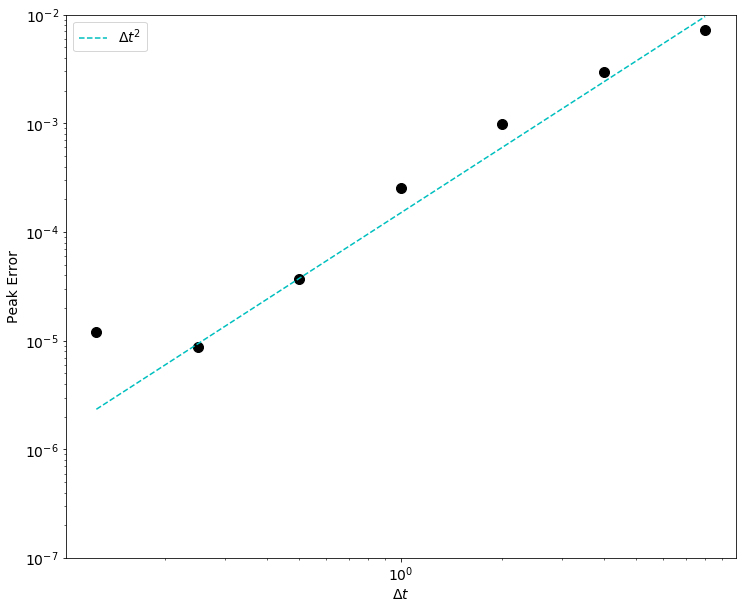

In [44]:
rcParams['figure.figsize'] = [12, 10]
print(delta_ts)
print(peak_errors)
plt.loglog(delta_ts, peak_errors, markersize=10, linestyle='None', marker='o', color='k')
plt.ylim(1e-7, 1e-2)
y = [1.5e-4 * delta_t**2 for delta_t in delta_ts]
print(y)
plt.loglog(delta_ts, y, linestyle='--', color='c', label=r'$\Delta t^2$')

plt.xlabel(r"$\Delta t$")
plt.ylabel("Peak Error")

plt.legend()
plt.show()

# 3. Korteweg – de Vries equation

In [226]:
def update_korteweg(grid, delta_x, delta_t, delta):
    xs, times = grid.shape
    
    for t in range(times - 1):
        if t % 10 == 0:
            print("-- {:0.2f}% done".format(100. * t / times), end='\r')
        
        right = np.roll(grid[:, t], -1, axis=0)
        right_2 = np.roll(grid[:, t], -2, axis=0)
        
        left = np.roll(grid[:, t], 1, axis=0)
        left_2 = np.roll(grid[:, t], 2, axis=0)
        
        previous = grid[:, t - 1]
        now = grid[:, t]
                
        grid[:, t + 1] = previous - (delta_t / (3 * delta_x)) * (right + now + left) * (right - left) - ((delta**2 * delta_t) / (delta_x**3)) * (right_2 - 2 * right + 2 * left - right_2)
        
def korteweg(min_x, max_x, delta_x, min_t, max_t, delta_t, delta=0.022):
    range_x = max_x - min_x
    range_t = max_t - min_t

    num_x, num_t = int(range_x / delta_x), int(range_t / delta_t)
    
    grid = np.zeros((num_x, num_t))
    grid[:, 0] = np.cos( np.pi * np.linspace(min_x, max_x, int(range_x / delta_x) ) )
    
    update_korteweg(grid, delta_x, delta_t, delta)

    return grid

In [227]:
min_x, max_x, delta_x, min_t, max_t, delta_t = 0, 2, 0.01, 0, 10 / np.pi, 1e-5

locations = np.linspace(min_x, max_x, int((max_x - min_x) / delta_x))
times = np.linspace(min_t, max_t, int((max_t - min_t) / delta_t))

grid = korteweg(min_x, max_x, delta_x, min_t, max_t, delta_t)

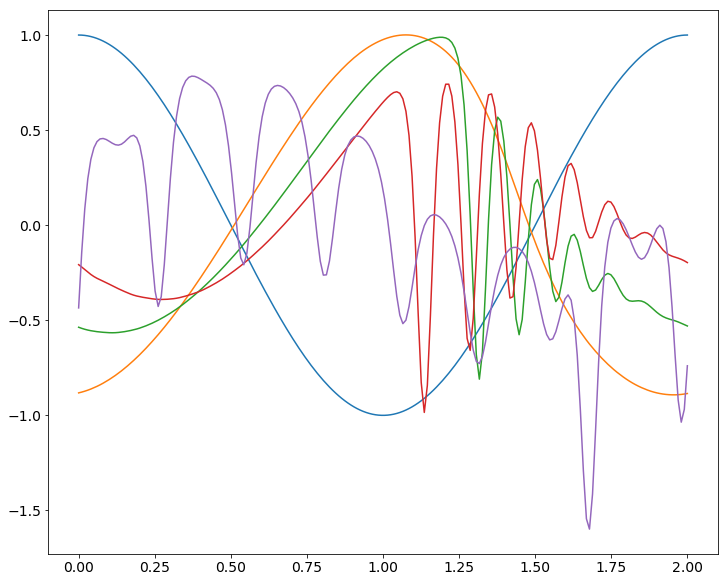

In [251]:
plt.plot(locations, grid[:, 0])
plt.plot(locations, grid[:, int((1 / np.pi) / delta_t)])
plt.plot(locations, grid[:, int((3 / np.pi) / delta_t)])
plt.plot(locations, grid[:, int((3.7 / np.pi) / delta_t)])
plt.plot(locations, grid[:, int((9.9 / np.pi) / delta_t)])

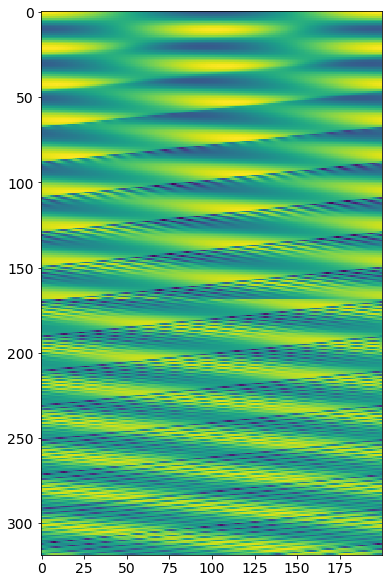

In [250]:
plt.imshow(grid[:, (times / delta_t).astype(int)[::1000]].T)

In [242]:
(times / delta_t).astype(int)[::1000]

array([     0,   1000,   2000,   3000,   4000,   5000,   6000,   7000,
         8000,   9000,  10000,  11000,  12000,  13000,  14000,  15000,
        16000,  17000,  18000,  19000,  20000,  21000,  22000,  23000,
        24000,  25000,  26000,  27000,  28000,  29000,  30000,  31000,
        32000,  33000,  34000,  35000,  36000,  37000,  38000,  39000,
        40000,  41000,  42000,  43000,  44000,  45000,  46000,  47000,
        48000,  49000,  50000,  51000,  52000,  53000,  54000,  55000,
        56000,  57000,  58000,  59000,  60000,  61000,  62000,  63000,
        64000,  65000,  66000,  67000,  68000,  69000,  70000,  71000,
        72000,  73000,  74000,  75000,  76000,  77000,  78000,  79000,
        80000,  81000,  82000,  83000,  84000,  85000,  86000,  87000,
        88000,  89000,  90000,  91000,  92000,  93000,  94000,  95000,
        96000,  97000,  98000,  99000, 100000, 101000, 102000, 103000,
       104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000,
      

In [252]:
from scipy.ndimage.interpolation import zoom

In [259]:
zoomed = zoom(grid, [1, 0.001])

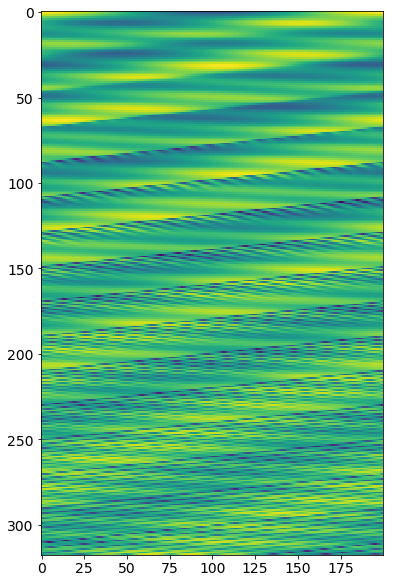

In [260]:
plt.imshow(zoomed.T)
plt.show()

In [277]:
for t in (times / delta_t).astype(int)[::500]:
    plt.plot(grid[:, t], color='k')
    plt.ylim(-1.85, 1.85)
    plt.savefig("images/image_%06d.jpg" % t)
    plt.close()